In [32]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle as pkl
import networkx as nx

# Idées :

- il y a plus de négatif que de positif, est ce qu'il vaut pas mieux donner des poids important aux positifs ?

In [33]:
# test_data = np.load('/kaggle/input/data-challenge-kernel-methods-2022-2023/test_data.pkl', allow_pickle=True)
# training_data = np.load('/kaggle/input/data-challenge-kernel-methods-2022-2023/training_data.pkl', allow_pickle=True)
# training_labels = np.load('/kaggle/input/data-challenge-kernel-methods-2022-2023/training_labels.pkl', allow_pickle=True)

test_data = np.load('./test_data.pkl', allow_pickle=True)
training_data = np.load('./training_data.pkl', allow_pickle=True)
training_labels = np.load('./training_labels.pkl', allow_pickle=True)

In [34]:
G = training_data[0]
print(type(G))
print(G.number_of_nodes())

<class 'networkx.classes.graph.Graph'>
16


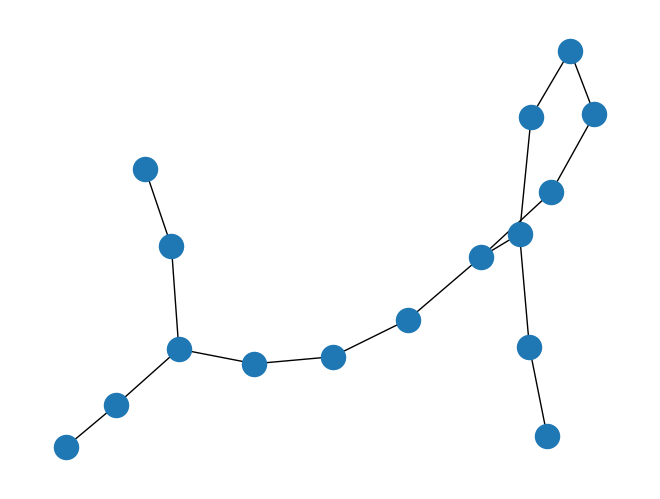

In [35]:
nx.draw(G)

In [36]:
list_of_all_nodes_training = []
for G in training_data:
    for node in G.nodes :
        list_of_all_nodes_training.append(G.nodes[node]['labels'][0])
        
np.histogram(list_of_all_nodes_training, bins = 49)

(array([15755, 68731,  6900,  1014,  1893,  1316,   277,    98,   293,
          106,     0,    25,    36,   239,     1,     7,     8,    20,
            1,     6,     0,    11,     3,     2,     3,     1,     3,
            4,    38,     0,     1,     5,     9,     7,     3,     1,
            1,     4,     1,     4,     1,     3,     1,     1,     3,
            2,     1,     1,     2]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]))

In [37]:
list_of_all_nodes_test = []
for G in test_data:
    for node in G.nodes :
        list_of_all_nodes_test.append(G.nodes[node]['labels'][0])

np.histogram(list_of_all_nodes_test, bins = 30)

(array([ 6551, 36457,  3175,   563,  1089,   554,   177,    12,   114,
           95,     6,     3,     7,    51,     2,     2,     3,     6,
            2,     2,     1,     5,     2,     2,     2,     1,     1,
            4,     1,     2]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]))

In [38]:
print(test_data[0])

Graph with 25 nodes and 26 edges


In [39]:
list_of_all_edges_test = []
# for G in test_data:
#     for edge in G._adj[i].keys() :
#         list_of_all_edges_test.append(G.nodes[node]['labels'][0])

for molec in test_data:
    for i in range(len(molec.nodes)):
        for ii in list(molec._adj[i].keys()):
            a, b = min(i,ii), max(i,ii)
            list_of_all_edges_test.append(molec._adj[i][ii]["labels"][0])

print(list_of_all_edges_test)
# np.histogram(list_of_all_edges_test, bins = 30)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
print(len(test_data))

2000


In [41]:
list_test_submission = np.zeros(2000)

In [42]:
np.savetxt('submission.csv', list_test_submission, delimiter=',')
# ! kaggle competitions submit -c data-challenge-kernel-methods-2022-2023 -f submission.csv -m "Message"

In [43]:
train = pkl.load(open("./training_data.pkl", "rb"))
trainy = pkl.load(open("./training_labels.pkl", "rb"))

def display_molec(idx, ax):

    molec = train[idx]
    atomtype = {}
    bondtype = {}
    for i in range(len(molec.nodes)):
        atomtype[i] = str(molec.nodes[i]["labels"][0])
        for ii in list(molec._adj[i].keys()):
            a, b = min(i,ii), max(i,ii)
            # bondtype[(a,b)] = str(molec._adj[i][ii]["labels"][0])
            bondtype[(a,b)] = molec._adj[i][ii]["labels"][0]*1.0

    pos = nx.kamada_kawai_layout(molec)
    # nx.draw(molec,with_labels=True, labels=atomtype, pos=pos, ax=ax)

    # nx.draw_networkx_edge_labels(molec, pos=pos, edge_labels=bondtype, ax=ax)
    nx.draw(molec,with_labels=True, labels=atomtype, pos=pos, ax=ax)
    nx.draw_networkx_edges(molec, pos=pos,  edge_color=[bondtype[color] for color in  bondtype.keys()] , width=6.0, ax=ax , edge_vmin= -5.0, edge_vmax=50.0)

    fig.suptitle(f"idx {idx}, classement {trainy[idx]}")




THERE SEEMS TO BE AN ISSUE, SOME OF THE NODES ARE NOT CONNECTED

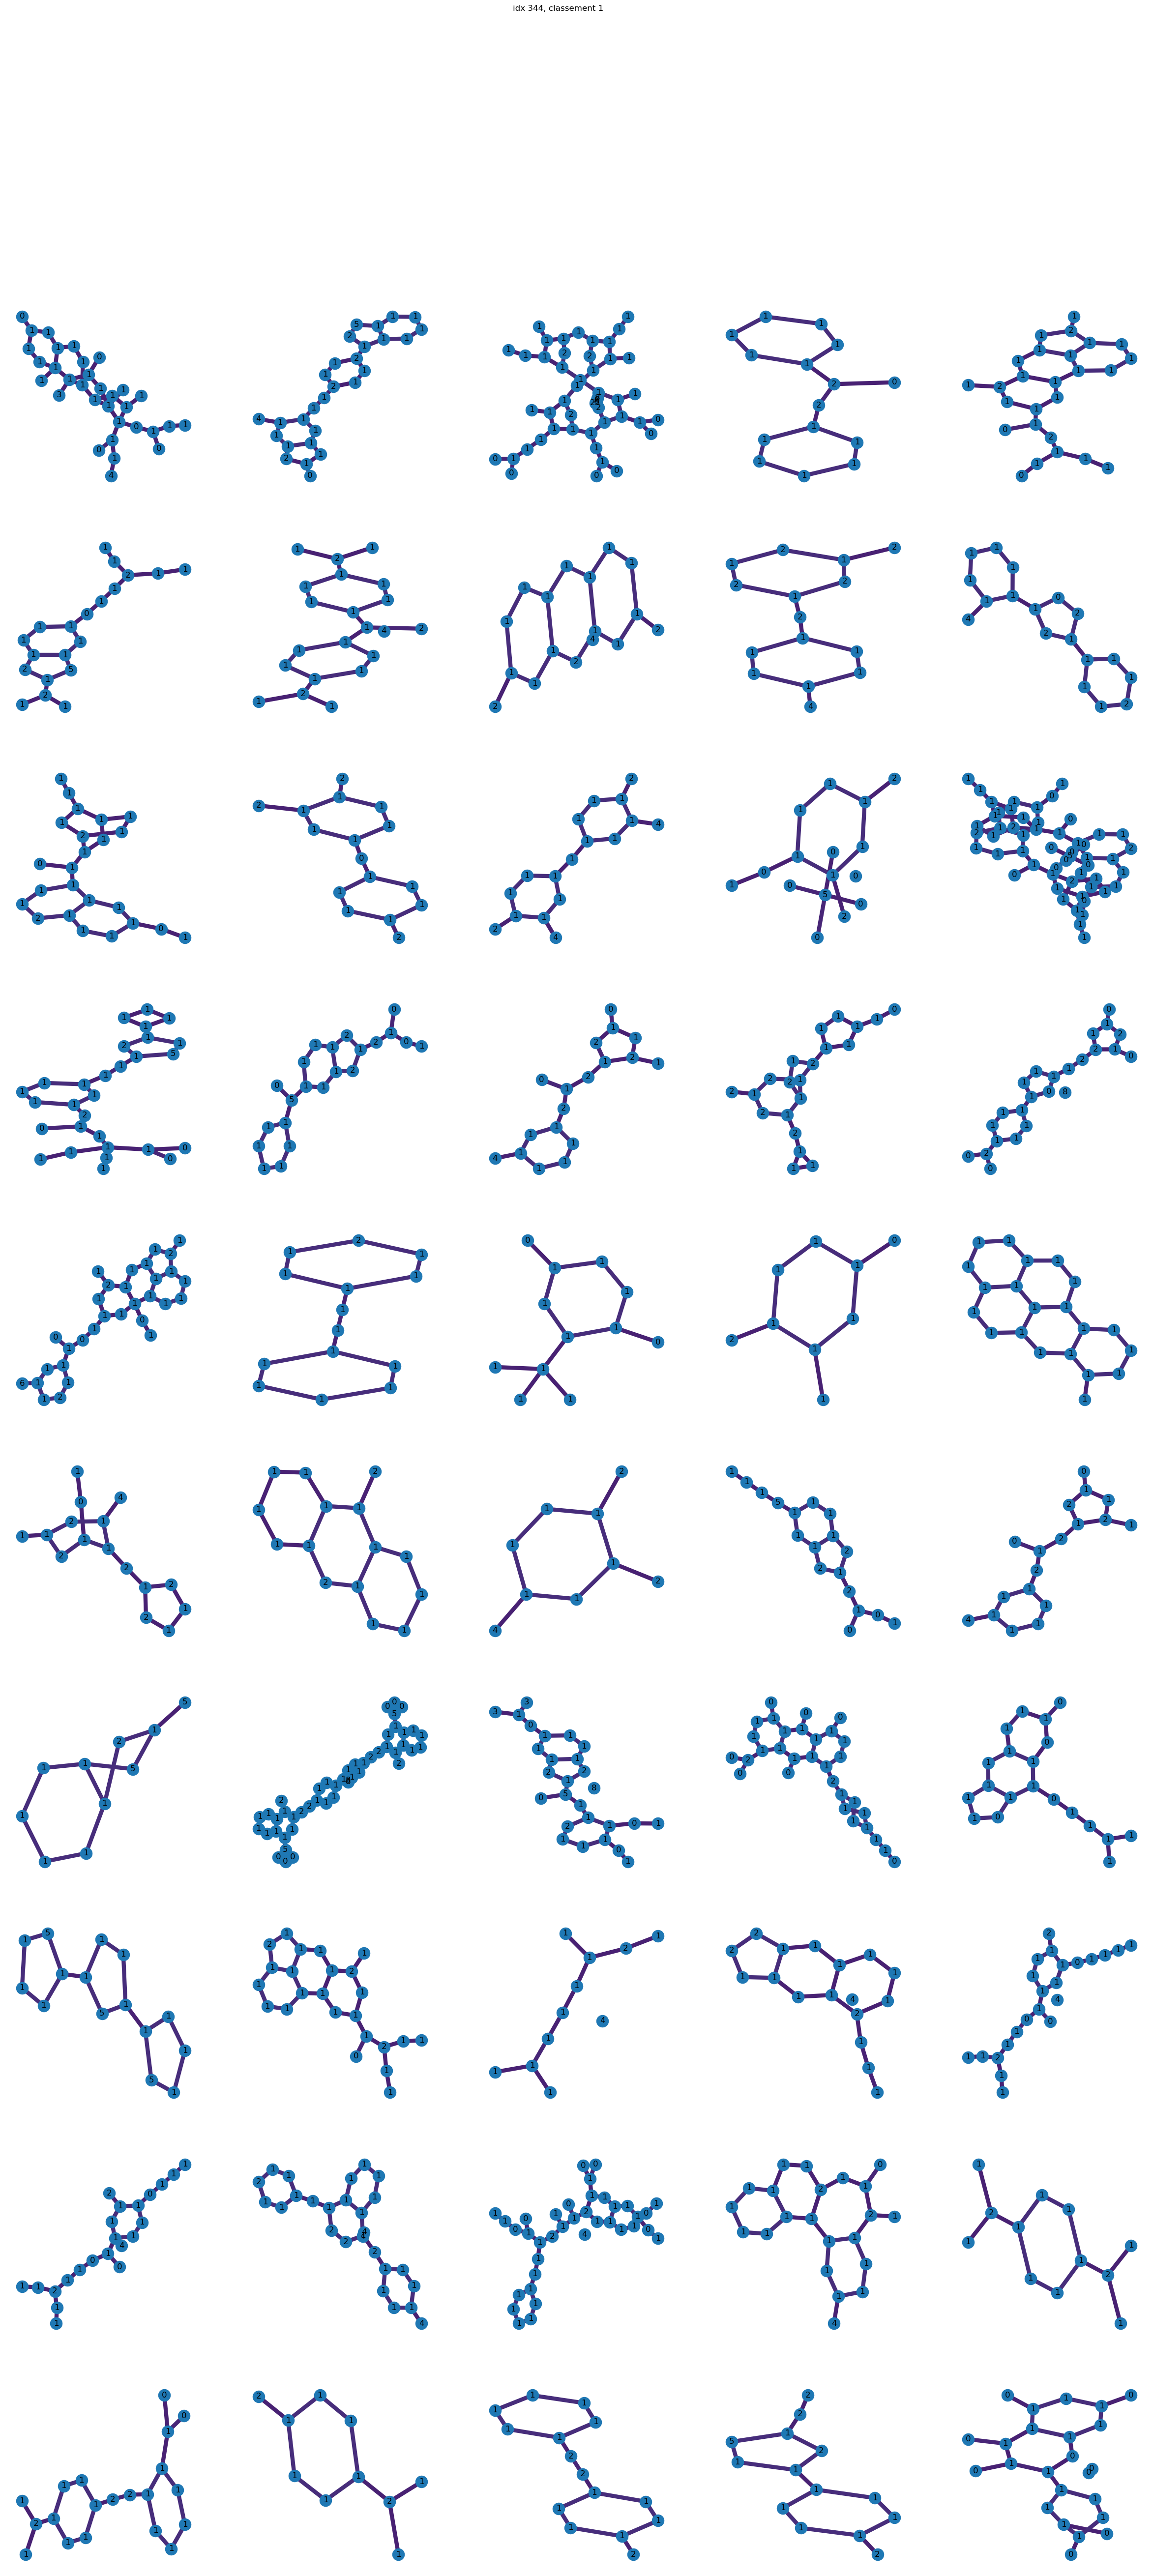

In [44]:
fig, axs = plt.subplots(10,5,figsize=(30, 60))

pos_idxs = np.where(trainy==1)[0]
for i in range(50) :
    display_molec(pos_idxs[i], axs[i//5,i%5])
plt.show()

In [45]:
# experiments for hashing graph : it works

In [46]:
graph = training_data[0].copy()
graph.nodes[0]['labels'][0] = 1
graph.edges[0,1]['labels'][0] = 1
print(graph.nodes[0]['labels'][0])
print(graph.edges[0,1]['labels'][0])
print(nx.weisfeiler_lehman_graph_hash(graph, edge_attr="labels", node_attr="labels", iterations=3, digest_size=16))
graph.nodes[0]['labels'][0] = 1
graph.edges[0,1]['labels'][0] = 2
print(graph.nodes[0]['labels'][0])
print(graph.edges[0,1]['labels'][0])
print(nx.weisfeiler_lehman_graph_hash(graph, edge_attr="labels", node_attr="labels", iterations=3, digest_size=16))
graph.nodes[0]['labels'][0] = 2
graph.edges[0,1]['labels'][0] = 1
print(graph.nodes[0]['labels'][0])
print(graph.edges[0,1]['labels'][0])
print(nx.weisfeiler_lehman_graph_hash(graph, edge_attr="labels", node_attr="labels", iterations=3, digest_size=16))
graph.nodes[0]['labels'][0] = 2
graph.edges[0,1]['labels'][0] = 2
print(graph.nodes[0]['labels'][0])
print(graph.edges[0,1]['labels'][0])
print(nx.weisfeiler_lehman_graph_hash(graph, edge_attr="labels", node_attr="labels", iterations=3, digest_size=16))

1
1
ef79c05ed5c1fdc650a4c7783795d186
1
2
baf51fd174c31f54feac86678d6078a1
2
1
f7e0f71defc1c68be731f10dcea0ca57
2
2
f0ef630acc84cec506dd67d4dbb8c42b


In [47]:
print( list(graph.neighbors(0)) ) 

[1, 3, 8]


In [48]:
from graph_subgraph_vectorization import graph_vectorization

In [49]:
# DAMN this is fast
graph = training_data[0].copy()
print(graph_vectorization(graph,35))


{'b05c9599e5211a0812c426666cf78fd5': 2, '6d4d0c5db40dff874944b78bfb9bab58': 12, 'd51aff509ed3bcb453bcb9fe49daade8': 2, '7ac033c002ef43c6de6b76ad7e50e50d': 2, '81133de84192f9fc3d815ed68a44abb5': 1, '7013910f50cac84a821d307ca010719a': 3, 'a827a93fa90f6c981cc2b0f0ed075662': 4, '66d5844555098627c6c33546c78811ae': 3, 'abd6a1df91a600f75a5b8e1c6a57c6c7': 3, '9a72cb6f8e63bfbcca40580b1b79255c': 1, 'cf876b85870b9a24cffea9f2856efa9d': 2, '33115afaeaabc6420e1340c3c549c709': 2, 'c5b8ca9afbb7e9295c35151264c8d80f': 1, '945f744afc2e4bc3e8f691cc4749448b': 1, 'd5c1bd08b710e89df8b1d3edb3e87fb3': 1, '9c53031bf40d3cbceab32fe59fdbb7f3': 1, '23ad67f5e8688f4b586a7369b2e66ebd': 3, '76fa13fb84a17b2770ff9ae6d998b772': 3, '11ee52d43d06779c6a1cf9ff0cac7704': 3, '98546e3a2af85da30b0ab25dd07e8658': 1, '0dc83f853c540745db81118cc12bbaba': 1, '83e51bdda239b5da2689a8fda4b6bfdb': 1, '29e3bf1d60a8f70f334a62ce1c7af21b': 2, '111e33d3b336c2abf7b849b4b2105c6a': 2, 'ec4f2b74066b3e57af10487ac78798c5': 2, '8af49e793a4f970640632c

In [50]:

### already defined in other python file

# def gauss_kernel( vect_a, vect_b, sigma_2 = 1.0 ) :
#     return( np.exp( -np.sum( (vect_a - vect_b)**2/sigma_2 ) ) )



# def subgraph_kernel(subgraph_hash_dict1,subgraph_hash_dict2 ) :
#     # we have difficult time defining a kernel here, a lot of decisions are arbitrary (for instance, metaparameters)
#     # we choose 

#     df1 = pd.DataFrame.from_dict(subgraph_hash_dict1, orient='index')
#     df2 = pd.DataFrame.from_dict(subgraph_hash_dict2, orient='index')
#     df3 = pd.concat([df1, df2], axis=1).fillna(0)
#     columns_array = np.array(df3)
    
#     result = gauss_kernel(columns_array[:,0],columns_array[:,1] )

#     return(result)

In [2]:
import time 
import numpy as np

In [18]:


# experiment on speed of calculations 

N = 1000
X = np.random.randn(N)
Y = np.random.randn(N)
start = time.time()
result = 0
for i in range(N) :
    result += np.sum(X[i]*Y)
end = time.time()
print(result)
print(end - start)

start = time.time()
result = 0
result = np.einsum('k,l->', X,Y)
end = time.time()
print(result)
print(end - start)



210.7905951245125
0.00948333740234375
210.79059512451272
0.0005290508270263672


In [1]:
a = (1,2,3,4)
print(a.shape)

AttributeError: 'tuple' object has no attribute 'shape'

In [2]:
from scipy.sparse import csr_array
import numpy as np

In [3]:
a = csr_array((10,10))
print(a)

In [4]:
a[3,2] = 1
a[5,1] = 2
a = a.power(2)
print(a)

  (3, 2)	1.0
  (5, 1)	4.0


/home/roland/miniconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [22]:
print(type(a))

<class 'scipy.sparse._arrays.csr_array'>


In [23]:
print(type(a.T))

<class 'scipy.sparse._arrays.csc_array'>


In [24]:
print(a.T)

  (2, 3)	1.0


In [33]:
a = a.sum(axis=1)

In [34]:
print(a.shape)

(10,)


In [36]:
print(a[None,:].T.shape)

(10, 1)


In [37]:
print(a)

[0. 0. 0. 1. 0. 4. 0. 0. 0. 0.]


In [7]:
print(4*a)
from tqdm import tqdm

  (3, 2)	inf
  (5, 1)	inf


In [9]:
for i in tqdm(range(25000000)) :
    a +=a

  1%|          | 136045/25000000 [00:08<26:51, 15431.90it/s]


KeyboardInterrupt: 